In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/stocks/ADANIPORTS.csv')

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

In [ ]:
prices = df['Close'].values.reshape(-1,1)

scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)

In [ ]:
def create_sequences(data, sequence_length):
  sequences = []
  labels = []
  for i in range(len(data) - (sequence_length+30)):
    sequences.append(data[i:i+sequence_length])
    labels.append(data[i+sequence_length+30])

  return np.array(sequences), np.array(labels)

sequence_length = 60
X, y = create_sequences(scaled_prices, sequence_length)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step


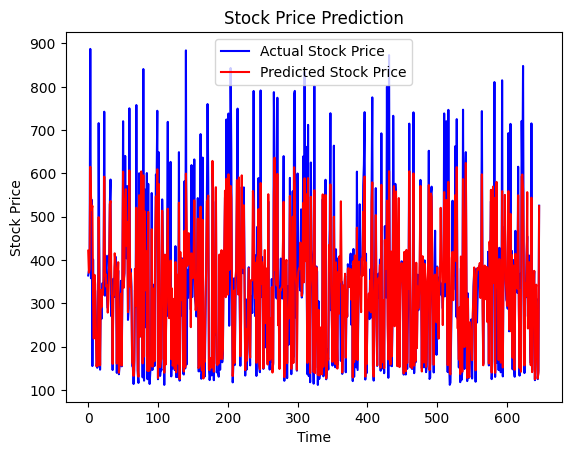

In [ ]:
predictions = model_1.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1,1))

# Plot the results
import matplotlib.pyplot as plt

plt.plot(actual_prices, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

# Calculate evaluation metrics
mae = mean_absolute_error(actual_prices, predictions)
mse = mean_squared_error(actual_prices, predictions)
rmse = root_mean_squared_error(actual_prices, predictions)
r2 = r2_score(actual_prices, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

NameError: name 'actual_prices' is not defined

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np

import pandas as pd

import keras
print(keras.__version__)
print(keras.backend.backend())
# output should be "tensorflow"

df = pd.read_csv('/content/drive/MyDrive/stocks/ADANIPORTS.csv')

3.4.1
tensorflow


In [ ]:
prices = df['Close'].values.reshape(-1,1)

scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)

def create_sequences(data, sequence_length):
  sequences = []
  labels = []
  for i in range(len(data) - (sequence_length+30)):
    sequences.append(data[i:i+sequence_length])
    labels.append(data[i+sequence_length+30])

  return np.array(sequences), np.array(labels)

sequence_length = 60
X, y = create_sequences(scaled_prices, sequence_length)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from keras.callbacks import EarlyStopping

# Building the LSTM model
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Helps prevent overfitting
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/250


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 443ms/step - loss: 0.0151 - val_loss: 0.0040
Epoch 2/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 439ms/step - loss: 0.0071 - val_loss: 0.0036
Epoch 3/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 442ms/step - loss: 0.0062 - val_loss: 0.0041
Epoch 4/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 33s 446ms/step - loss: 0.0061 - val_loss: 0.0037
Epoch 5/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 426ms/step - loss: 0.0059 - val_loss: 0.0032
Epoch 6/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 431ms/step - loss: 0.0058 - val_loss: 0.0039
Epoch 7/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 425ms/step - loss: 0.0053 - val_loss: 0.0036
Epoch 8/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 31s 428ms/step - loss: 0.0053 - val_loss: 0.0032
Epoch 9/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 435ms/step - loss: 0.0052 - val_loss: 0.0032
Epoch 10/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 430ms/step - loss: 0.0044 - val_loss: 0.0029
Epoch 11/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 431ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 12/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 41

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

p_test = model.predict(X_test)
p_test = scaler.inverse_transform(p_test)
actual_prices = scaler.inverse_transform(y_test.reshape(-1,1))

mae = mean_absolute_error(actual_prices, p_test)
mse = mean_squared_error(actual_prices, p_test)
rmse = root_mean_squared_error(actual_prices, p_test)
r2 = r2_score(actual_prices, p_test)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')



21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step
Mean Absolute Error (MAE): 27.407864832693868
Mean Squared Error (MSE): 1642.0013828076637
Root Mean Squared Error (RMSE): 40.52161624130587
R-squared (R²): 0.9488475125940817


In [ ]:
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

# Building the LSTM model with Batch Normalization
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),  # Normalize after the first LSTM layer
    Dropout(0.2),
    LSTM(128, return_sequences=True),
    BatchNormalization(),  # Normalize after the second LSTM layer
    Dropout(0.2),
    LSTM(128, return_sequences=True),
    BatchNormalization(),  # Normalize after the third LSTM layer
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    BatchNormalization(),  # Normalize after the final LSTM layer
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.1, callbacks=[early_stopping])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 460ms/step - loss: 1.1254 - val_loss: 0.0357
Epoch 2/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 464ms/step - loss: 0.4980 - val_loss: 0.0167
Epoch 3/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 33s 456ms/step - loss: 0.3580 - val_loss: 0.0158
Epoch 4/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 441ms/step - loss: 0.2829 - val_loss: 0.0300
Epoch 5/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 465ms/step - loss: 0.2155 - val_loss: 0.0137
Epoch 6/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 444ms/step - loss: 0.1958 - val_loss: 0.0159
Epoch 7/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 441ms/step - loss: 0.1383 - val_loss: 0.0079
Epoch 8/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 43s 459ms/step - loss: 0.1130 - val_loss: 0.0045
Epoch 9/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 33s 452ms/step - loss: 0.0789 - val_loss: 0.0057
Epoch 10/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 447ms/step - loss: 0.0727 - val_loss: 0.0039
Epoch 11/250
73/73 ━━━━━━━━━━━━━━━━━━━━ 33s 453ms/step - loss: 0.0532 - val_loss: 0.0041
Epoch 12/250
73/73 ━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

p_test = model.predict(X_test)
p_test = scaler.inverse_transform(p_test)
actual_prices = scaler.inverse_transform(y_test.reshape(-1,1))

mae = mean_absolute_error(actual_prices, p_test)
mse = mean_squared_error(actual_prices, p_test)
rmse = root_mean_squared_error(actual_prices, p_test)
r2 = r2_score(actual_prices, p_test)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')


21/21 [==============================] - 2s 51ms/step
Mean Absolute Error (MAE): 41.41981435831769
Mean Squared Error (MSE): 4782.440591015448
Root Mean Squared Error (RMSE): 69.15519207561677
R-squared (R²): 0.8510149049429119


In [ ]:
!pip install hyperopt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 14.2 MB/s eta 0:00:00


In [ ]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from keras.optimizers import Adam

def create_model(params):
    model = Sequential()
    for i in range(params['num_layers']):
        model.add(LSTM(units=params['units'],
                       return_sequences=True if i < params['num_layers'] - 1 else False,
                       input_shape=(sequence_length, 1)))
    model.add(Dense(units=1))
    model.compile(optimizer=Adam(learning_rate=params['learning_rate']),
                  loss='mean_squared_error')
    return model

def objective(params):
    model = create_model(params)
    history = model.fit(X_train, y_train,
                        epochs=params['epochs'],
                        batch_size=32,
                        validation_split=0.2,
                        verbose=0)
    val_loss = min(history.history['val_loss'])
    return {'loss': val_loss, 'status': STATUS_OK}

  8%|▊         | 4/50 [2:37:47<27:29:41, 2151.78s/trial, best loss: 0.001543595688417554]

#This is something

In [ ]:
space = {
    'num_layers': hp.choice('num_layers', [3, 4, 5]),
    'units': hp.choice('units', [32, 64, 128, 256]),
    'learning_rate': hp.loguniform('learning_rate', -5, -2),
    'epochs': hp.choice('epochs', [100, 200, 250, 300, 350])
}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials,
            )

print("Best hyperparameters:", best)

No GPUs available.

100%|██████████| 1/1 [2:06:53<00:00, 7613.19s/trial, best loss: 0.003633420215919614]


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/trails/trials.pkl'